# With Pytorch

Epoch 0, Loss: 0.282686
Epoch 1000, Loss: 0.247257
Epoch 2000, Loss: 0.117303
Epoch 3000, Loss: 0.009610
Epoch 4000, Loss: 0.003592
Epoch 5000, Loss: 0.002095
Epoch 6000, Loss: 0.001451
Epoch 7000, Loss: 0.001100
Epoch 8000, Loss: 0.000880
Epoch 9000, Loss: 0.000731

Input:
tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])

Target output:
tensor([[0.],
        [1.],
        [1.],
        [0.]])

Predicted output (raw):
tensor([[0.0244],
        [0.9814],
        [0.9707],
        [0.0263]])

Predicted output (binary):
tensor([[0.],
        [1.],
        [1.],
        [0.]])


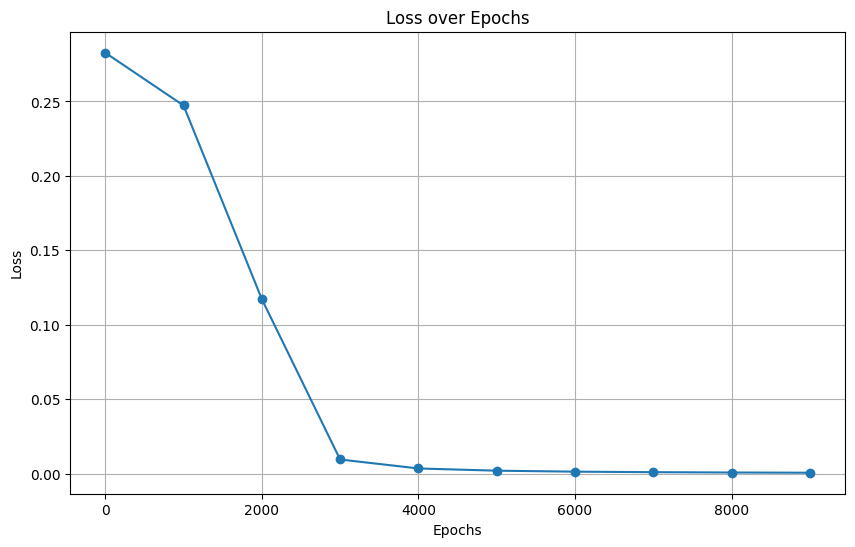

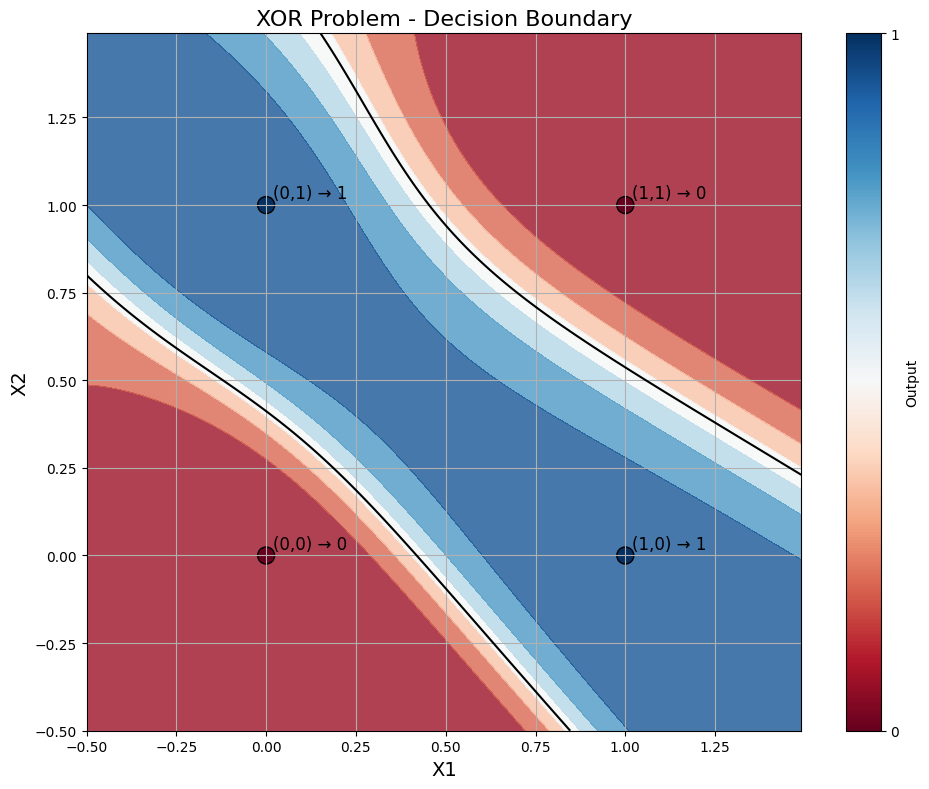

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define the MLP network
class SimpleMLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleMLP, self).__init__()

        # Define layers
        self.hidden = nn.Linear(input_size, hidden_size)
        self.output = nn.Linear(hidden_size, output_size)

        # Define activation functions
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Hidden layer
        hidden_output = self.sigmoid(self.hidden(x))

        # Output layer
        output = self.sigmoid(self.output(hidden_output))

        return output

# XOR problem dataset
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

# Create model
input_size = 2
hidden_size = 4
output_size = 1
model = SimpleMLP(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.5)

# Training loop
epochs = 10000
losses = []

for epoch in range(epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Store loss every 1000 epochs
    if epoch % 1000 == 0:
        losses.append(loss.item())
        print(f'Epoch {epoch}, Loss: {loss.item():.6f}')

# Test the model
with torch.no_grad():
    predicted = model(X)
    binary_predictions = (predicted >= 0.5).float()

    print("\nInput:")
    print(X)
    print("\nTarget output:")
    print(y)
    print("\nPredicted output (raw):")
    print(predicted)
    print("\nPredicted output (binary):")
    print(binary_predictions)

# Plot loss over time
plt.figure(figsize=(10, 6))
plt.plot(range(0, epochs, 1000), losses, marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Visualize decision boundary
def plot_decision_boundary(model):
    # Create a mesh grid
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Get predictions for the entire grid
    grid = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])
    with torch.no_grad():
        Z = model(grid)
    Z = Z.numpy().reshape(xx.shape)

    # Plot the contour
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
    plt.contour(xx, yy, Z, colors='k', linestyles='-', levels=[0.5])

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y.reshape(-1), cmap=plt.cm.RdBu, edgecolors='k', s=150)

    # Label the points
    for i, point in enumerate(X.numpy()):
        plt.annotate(f'({int(point[0])},{int(point[1])}) → {int(y[i][0])}',
                     (point[0], point[1]),
                     xytext=(5, 5),
                     textcoords='offset points',
                     fontsize=12)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('X1', fontsize=14)
    plt.ylabel('X2', fontsize=14)
    plt.title('XOR Problem - Decision Boundary', fontsize=16)
    plt.grid(True)
    plt.colorbar(ticks=[0, 1], label='Output')
    plt.tight_layout()
    plt.show()

# Plot the decision boundary
plot_decision_boundary(model)

In [6]:
import numpy as np

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)  # Derivative of sigmoid(x) when x = sigmoid(z)

# XOR dataset: 4 samples with 2 features
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

# XOR labels
y = np.array([[0],
              [1],
              [1],
              [0]])

# Seed for reproducibility
np.random.seed(42)

# Initialize weights randomly with small values
input_size = 2      # 2 input neurons (x1, x2)
hidden_size = 3     # 3 hidden neurons
output_size = 1     # 1 output neuron

# Weights and biases
W1 = np.random.randn(input_size, hidden_size) * 0.1  # (2x3) weight matrix for hidden layer
b1 = np.zeros((1, hidden_size))                      # (1x3) bias vector for hidden layer

W2 = np.random.randn(hidden_size, output_size) * 0.1 # (3x1) weight matrix for output layer
b2 = np.zeros((1, output_size))                      # (1x1) bias for output layer

# Learning rate
lr = 0.5
epochs = 10000

# Training loop
for epoch in range(epochs):
    # ----- Forward Pass -----
    # Hidden layer
    Z1 = np.dot(X, W1) + b1    # Linear transformation: Z1 = XW1 + b1
    H = sigmoid(Z1)            # Activation function: H = σ(Z1)

    # Output layer
    Z2 = np.dot(H, W2) + b2    # Linear transformation: Z2 = HW2 + b2
    Y_pred = sigmoid(Z2)       # Activation function: Y_pred = σ(Z2)

    # ----- Compute Error -----
    error = 0.5 * (y - Y_pred) ** 2  # Squared error loss
    loss = np.sum(error) / X.shape[0]  # Average loss

    # ----- Backpropagation -----
    # Output layer gradients
    dE_dYpred = Y_pred - y               # dE/dŷ = (ŷ - y)
    dYpred_dZ2 = sigmoid_derivative(Y_pred)  # dŷ/dZ2 = sigmoid'(Z2)

    dZ2_dW2 = H  # dZ2/dW2 = H
    delta2 = dE_dYpred * dYpred_dZ2  # δ2 = (ŷ - y) * sigmoid'(Z2)

    # Gradient w.r.t. output layer weights
    dE_dW2 = np.dot(H.T, delta2)  # dE/dW2 = H^T * δ2
    dE_db2 = np.sum(delta2, axis=0, keepdims=True)  # dE/db2 = sum(δ2)

    # Hidden layer gradients
    dZ2_dH = W2.T  # dZ2/dH = W2^T
    delta1 = np.dot(delta2, dZ2_dH) * sigmoid_derivative(H)  # δ1 = (δ2 * W2^T) * sigmoid'(Z1)

    # Gradient w.r.t. hidden layer weights
    dE_dW1 = np.dot(X.T, delta1)  # dE/dW1 = X^T * δ1
    dE_db1 = np.sum(delta1, axis=0, keepdims=True)  # dE/db1 = sum(δ1)

    # ----- Gradient Descent Weight Updates -----
    W2 -= lr * dE_dW2  # W2 = W2 - η * dE/dW2
    b2 -= lr * dE_db2  # b2 = b2 - η * dE/db2

    W1 -= lr * dE_dW1  # W1 = W1 - η * dE/dW1
    b1 -= lr * dE_db1  # b1 = b1 - η * dE/db1

    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.6f}")

# ----- Testing the trained MLP -----
print("\nFinal predictions after training:")
for i in range(len(X)):
    z1 = np.dot(X[i], W1) + b1
    h = sigmoid(z1)
    z2 = np.dot(h, W2) + b2
    y_pred = sigmoid(z2)
    print(f"Input: {X[i]}, Predicted: {y_pred[0][0]:.4f}, Actual: {y[i][0]}")


Epoch 0: Loss = 0.125295
Epoch 1000: Loss = 0.125000
Epoch 2000: Loss = 0.124999
Epoch 3000: Loss = 0.124997
Epoch 4000: Loss = 0.124984
Epoch 5000: Loss = 0.118427
Epoch 6000: Loss = 0.003653
Epoch 7000: Loss = 0.001049
Epoch 8000: Loss = 0.000583
Epoch 9000: Loss = 0.000397

Final predictions after training:
Input: [0 0], Predicted: 0.0282, Actual: 0
Input: [0 1], Predicted: 0.9769, Actual: 1
Input: [1 0], Predicted: 0.9769, Actual: 1
Input: [1 1], Predicted: 0.0231, Actual: 0
